<a href="https://colab.research.google.com/github/sbiswal14/BAIS/blob/main/diabetes_notebook_students_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simplified Machine Learning Project checklist:**
*We should write this checklist on the whiteboard before the workshop*

**Get the data**
  1. Import essential libraries
  2. Load the data
  3. Check the size and type of data
  4. Sample a test set, put it aside, and never look at it

**Explore the data**
  1. Create a copy of the data for exploration
  2. Study each attribute and its characteristics
    - Data Type (Continuous or Categorical)
    - Identify the target variable
  3. Visualize the data
  4. Study the correlations between attributes.

**Prepare the Data**

*(Apply what we do on the train set to the test set)*
  1. Data cleaning (We will provide a fairly clean dataset for now)
  2. Feature selection: Drop the attributes that provide no useful information for the task.
  3. Convert categorical columns to numeric columns (dummy variables)
  4. Feature scaling: Standardize or normalize features.

**Machine Learning (Simplified)**
  1. Train the model on the training set
  2. Make predictions on the test set
  3. Evaluate the accuracy of the model

# Information about the data
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

# Get The Data

## Import essential libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


## Load the data

[Click this link to download the diabetes dataset](https://drive.google.com/file/d/1UhiNxG9YddTACvaBrqmF2SqxxNEQLP67/view?usp=sharing)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Check the size and type of the data

In [4]:
# Size of the data
df.shape

(768, 9)

This dataset has 768 rows and 9 columns

In [5]:
# Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Sample a test set

In [7]:
# Split the dataset into a train set and a test set
train_set, test_set = train_test_split(df)

# Explore the data

## Create a copy of the data for exploration

In [8]:
train_data = train_set.copy()

In [9]:
train_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
312,2,155,74,17,96,26.6,0.433,27,1
334,1,95,60,18,58,23.9,0.260,22,0
199,4,148,60,27,318,30.9,0.150,29,1
698,4,127,88,11,155,34.5,0.598,28,0
191,9,123,70,44,94,33.1,0.374,40,0
...,...,...,...,...,...,...,...,...,...
309,2,124,68,28,205,32.9,0.875,30,1
658,11,127,106,0,0,39.0,0.190,51,0
693,7,129,68,49,125,38.5,0.439,43,1
67,2,109,92,0,0,42.7,0.845,54,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
468,8,120,0,0,0,30.0,0.183,38,1
288,4,96,56,17,49,20.8,0.340,26,0
171,6,134,70,23,130,35.4,0.542,29,1
271,2,108,62,32,56,25.2,0.128,21,0
725,4,112,78,40,0,39.4,0.236,38,0
...,...,...,...,...,...,...,...,...,...
614,11,138,74,26,144,36.1,0.557,50,1
330,8,118,72,19,0,23.1,1.476,46,0
357,13,129,0,30,0,39.9,0.569,44,1
275,2,100,70,52,57,40.5,0.677,25,0


## Study each attribute and its characteristics

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 312 to 6
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    int64  
 1   Glucose                   576 non-null    int64  
 2   BloodPressure             576 non-null    int64  
 3   SkinThickness             576 non-null    int64  
 4   Insulin                   576 non-null    int64  
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    int64  
 8   Outcome                   576 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 45.0 KB


In [12]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,576.0,3.840278,3.402124,0.000,1.00000,3.000,6.0000,17.000
Glucose,576.0,120.680556,32.526570,0.000,99.00000,117.000,140.0000,199.000
BloodPressure,576.0,69.779514,18.656483,0.000,64.00000,72.000,80.0000,122.000
SkinThickness,576.0,20.730903,16.088521,0.000,0.00000,23.000,33.0000,99.000
Insulin,576.0,78.715278,112.839796,0.000,0.00000,36.500,126.0000,846.000
BMI,576.0,32.238021,8.180124,0.000,27.50000,32.500,37.1250,67.100
DiabetesPedigreeFunction,576.0,0.468318,0.312452,0.078,0.24675,0.377,0.6275,2.137
Age,576.0,33.199653,11.784149,21.000,24.00000,29.000,41.0000,81.000
Outcome,576.0,0.347222,0.476501,0.000,0.00000,0.000,1.0000,1.000


The target variable is the `Outcome` variable

## Visualize the data

### Histogram

Using Seaborn

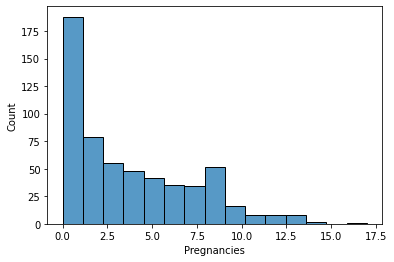

In [13]:
sns.histplot(data=train_data['Pregnancies'])

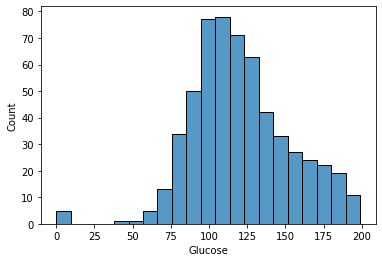

In [14]:
sns.histplot(data=train_data['Glucose'])

There is a better way to plot histogram for all continuous variables -> Use Pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccad55b450>,
      dtype=object)

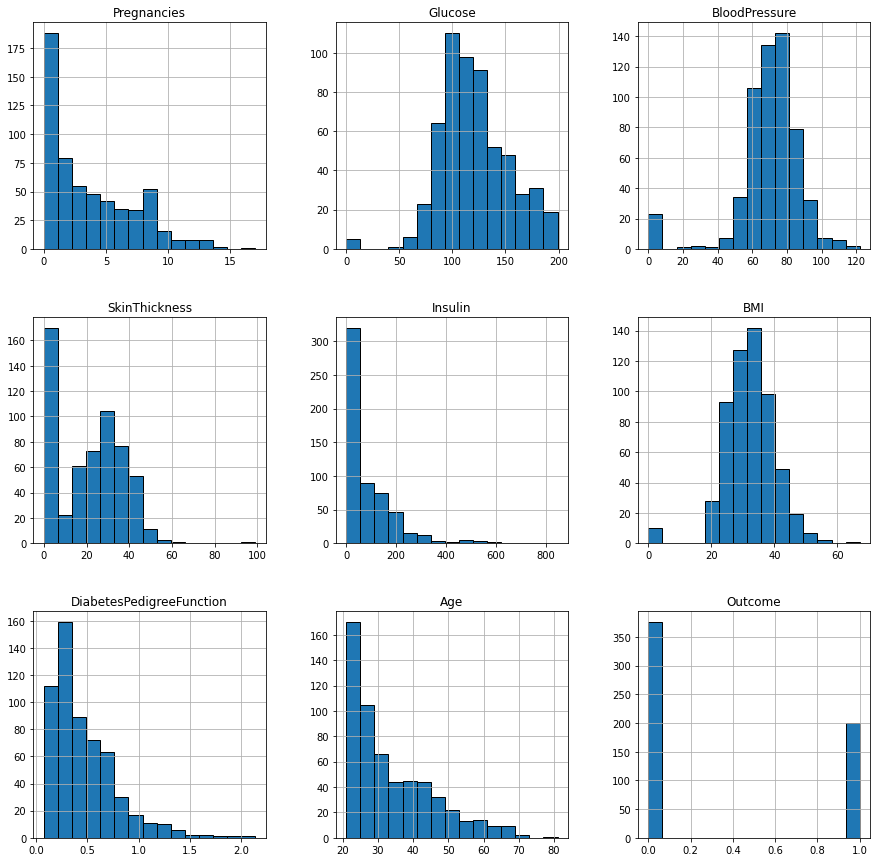

In [15]:
train_data.hist(bins = 15, edgecolor = 'black', figsize=(15,15))

- Bins: The maxinimum number of bins for each histogram
- edgecolor: The color of the edge of each bin
- figsize: The size of the figure 

### Study the correlations between variables and the target variable `Outcome`

In [17]:
corr = train_data.corr()['Outcome'].sort_values(ascending = False).reset_index()
corr

,index,Outcome
0,Outcome,1.000000
1,Glucose,0.466443
2,BMI,0.301035
3,Pregnancies,0.239175
4,Age,0.195455
5,DiabetesPedigreeFunction,0.155061
6,Insulin,0.150337
7,SkinThickness,0.118378
8,BloodPressure,0.069468


- `.corr()`: Create a correlation table
- `['Outcome']`: Choose the `Outcome` column because we only want the correlation between variables and the `Outcome` column
- `sort_values(ascending=False)`: Sort values descendingly
- `reset_index()`: Reset the index level


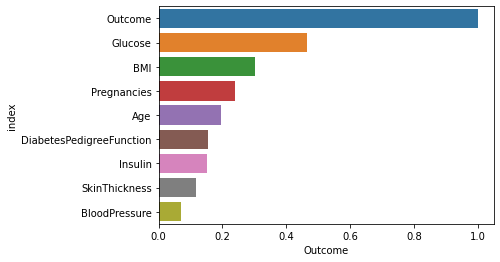

In [20]:
# Horizontal bar graph
sns.barplot(data = corr, x= 'Outcome', y = 'index', orient='h')

### Study the correlations between variables with heatmap

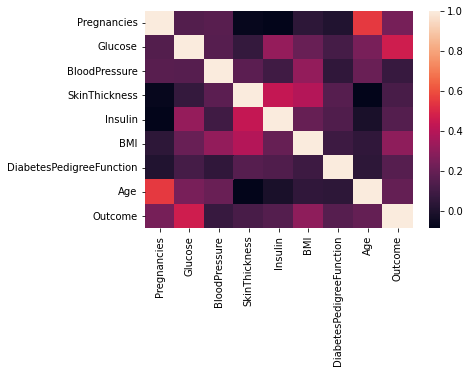

In [21]:
sns.heatmap(train_data.corr())

# Prepare the data

Since the dataset is clean now. We just need to scale the data. We will skip step 1 to 3. We will talk about these 3 steps in next week workshop

In [23]:
# Split the train set and test set into indepedent variables and dependent variable
X_train = train_set.drop(columns = ['Outcome'])
Y_train = train_set['Outcome']

X_test = test_set.drop('Outcome', axis = 1)
Y_test = test_set['Outcome']

Scale the dataset

In [24]:
# Scale the dataset
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Machine Learning

In [26]:
# Initiate the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, Y_train)

# Make predictions
prediction = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(Y_test, prediction))
print(classification_report(Y_test, prediction))

[[107  17]
 [ 27  41]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       124
           1       0.71      0.60      0.65        68

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.77      0.77       192



Confusion Matrix
- x axis is predicted labels (0 is the uppermost)
- y axis is true label (0 is on the left)

Classification Report: We will pay attention to the accuracy score score for now


